In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
params = {'figure.figsize': (10,7),
          'axes.labelsize': 18,
          'font.size': 18,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'legend.fontsize': 16}
sns.set(palette='Set2', style='ticks', rc=params)

In [2]:
puzzle_str = '''<x=-13, y=14, z=-7>
<x=-18, y=9, z=0>
<x=0, y=-3, z=-3>
<x=-15, y=3, z=-13>'''

## Part 1 ##

In [3]:
test_str = '''<x=-1, y=0, z=2>
<x=2, y=-10, z=-7>
<x=4, y=-8, z=8>
<x=3, y=5, z=-1>'''

In [4]:
def parseinp(str):
	particles = []
	for line in str.split('\n'):
		xs, ys, zs = line[1:-1].split(',')
		particle = {'x': int(xs.split('=')[1]),
		            'y': int(ys.split('=')[1]),
		            'z': int(zs.split('=')[1]),
		            'vx': 0, 'vy': 0, 'vz': 0}
		particles.append(particle)
	return particles

In [5]:
def step(particles):
	n = len(particles)
	for j in range(0, n-1):
		pj = particles[j]
		for k in range(j, n):
			pk = particles[k]
			xjk = pk['x'] - pj['x']
			pj['vx'] += np.sign(xjk)
			pk['vx'] -= np.sign(xjk)
			yjk = pk['y'] - pj['y']
			pj['vy'] += np.sign(yjk)
			pk['vy'] -= np.sign(yjk)
			zjk = pk['z'] - pj['z']
			pj['vz'] += np.sign(zjk)
			pk['vz'] -= np.sign(zjk)
	for p in particles:
		p['x'] += p['vx']
		p['y'] += p['vy']
		p['z'] += p['vz']

In [6]:
def energy(particles):
	E = 0
	for p in particles:
		pe = np.abs(p['x']) + np.abs(p['y']) + np.abs(p['z'])
		ke = np.abs(p['vx']) + np.abs(p['vy']) + np.abs(p['vz'])
		E += pe*ke
	return E

In [7]:
tstparticles = parseinp(test_str)
for i in range(10):
	step(tstparticles)
print(tstparticles)
print(energy(tstparticles))

[{'x': 2, 'y': 1, 'z': -3, 'vx': -3, 'vy': -2, 'vz': 1}, {'x': 1, 'y': -8, 'z': 0, 'vx': -1, 'vy': 1, 'vz': 3}, {'x': 3, 'y': -6, 'z': 1, 'vx': 3, 'vy': 2, 'vz': -3}, {'x': 2, 'y': 0, 'z': 4, 'vx': 1, 'vy': -1, 'vz': -1}]
179


In [8]:
puzzle_particles = parseinp(puzzle_str)
nsteps = 1000
for i in range(nsteps):
	step(puzzle_particles)
E = energy(puzzle_particles)
print(f'Part 1: E = {E}')

Part 1: E = 7138


## Part 2 ##

The trajectories are going to be periodic. From the problem description, my guess is that the periods are incommensurate, so the period for the entire system to return to the original point in phase space is very, very long. We can compute that if we know the individual periods, though.

In [9]:
puzzle_particles = parseinp(puzzle_str)
trajectory = {}
nsteps = 200000
for i in range(nsteps):
    for i, p in enumerate(puzzle_particles):
        for key in p:
            newkey = ''.join((key, str(i)))
            trajectory.setdefault(newkey, []).append(p[key])
    step(puzzle_particles)


In [10]:
df = pd.DataFrame.from_dict(trajectory)
df['t'] = df.index
df.head()

,x0,y0,z0,vx0,vy0,vz0,x1,y1,z1,vx1,...,vx2,vy2,vz2,x3,y3,z3,vx3,vy3,vz3,t
0,-13,14,-7,0,0,0,-18,9,0,0,...,0,0,0,-15,3,-13,0,0,0,0
1,-14,11,-6,-1,-3,1,-15,8,-3,3,...,-3,3,-1,-14,4,-10,1,1,3,1
2,-15,5,-4,-1,-6,2,-9,6,-9,6,...,-6,6,-2,-13,6,-4,1,2,6,2
3,-13,2,-4,2,-3,0,-5,3,-12,4,...,-8,5,-1,-11,7,0,2,1,4,3
4,-10,2,-5,3,0,-1,-4,1,-12,1,...,-5,2,0,-10,7,1,1,0,1,4


In [11]:
df.iloc[0]

x0    -13
y0     14
z0     -7
vx0     0
vy0     0
vz0     0
x1    -18
y1      9
z1      0
vx1     0
vy1     0
vz1     0
x2      0
y2     -3
z2     -3
vx2     0
vy2     0
vz2     0
x3    -15
y3      3
z3    -13
vx3     0
vy3     0
vz3     0
t       0
Name: 0, dtype: int64

Text(0.5, 0, 'step')

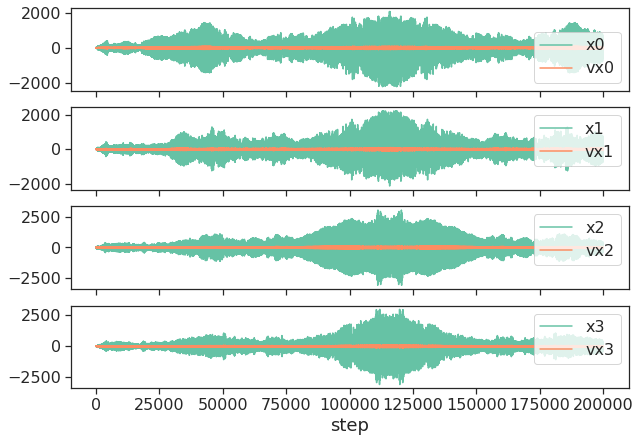

In [12]:
fig, ax = plt.subplots(4, 1, sharex=True)
for i in range(4):
    xkey = f'x{i}'
    vkey = f'vx{i}'
    ax[i].plot(df['t'], df[xkey]-df[xkey].iloc[0], '-', label=xkey)
    ax[i].plot(df['t'], df[vkey]-df[vkey].iloc[0], '-', label=vkey)
    ax[i].legend(loc='best')
plt.xlabel('step')
#plt.axis([0, 2000, -450, 300])

In [13]:
df[(df['x0'] == df['x0'].iloc[0]) & (df['vx0'] == 0)][['t', 'x0', 'vx0']]

,t,x0,vx0
0,0,-13,0
1083,1083,-13,0
1236,1236,-13,0
61207,61207,-13,0
170407,170407,-13,0


In [14]:
for i in range(4):
    xkey = f'x{i}'
    vkey = f'vx{i}'
    print(df[(df[xkey] == df[xkey].iloc[0]) & (df[vkey] == 0)][['t', xkey, vkey]])

             t  x0  vx0
0            0 -13    0
1083      1083 -13    0
1236      1236 -13    0
61207    61207 -13    0
170407  170407 -13    0
             t  x1  vx1
0            0 -18    0
9            9 -18    0
1693      1693 -18    0
22160    22160 -18    0
41415    41415 -18    0
190199  190199 -18    0
             t  x2  vx2
0            0   0    0
27011    27011   0    0
33555    33555   0    0
57479    57479   0    0
174135  174135   0    0
198059  198059   0    0
             t  x3  vx3
0            0 -15    0
27253    27253 -15    0
34827    34827 -15    0
196787  196787 -15    0


Looks like the individual trajectories are beats, with a very long period before all four moons come back to place. I certainly don't want to store that entire trajectory. Okay, brute force and looking. Once all four moons have their original x coordinates and 0 velocity, that's the point where the trajectory will repeat. Each x, y, z trajectory is independent.

In [15]:
puzzle_particles = parseinp(puzzle_str)
origin = puzzle_particles.copy()
print(origin)
xreturn = []
yreturn = []
zreturn = []
j = 0
while True:
    j += 1
    if i > 10000000:
        break
    step(puzzle_particles)
    xdiff = ydiff = zdiff = 0
    vx = vy = vz = 0
    for i in range(4):
        xkey = f'x{i}'
        ykey = f'y{i}'
        zkey = f'z{i}'
        xdiff += np.abs(puzzle_particles[i]['x'] - origin[i]['x'])
        ydiff += np.abs(puzzle_particles[i]['y'] - origin[i]['y'])
        zdiff += np.abs(puzzle_particles[i]['z'] - origin[i]['z'])
        vx += np.abs(puzzle_particles[i]['vx'])
        vy += np.abs(puzzle_particles[i]['vy'])
        vz += np.abs(puzzle_particles[i]['vz'])
    if (xdiff == 0) and (vx == 0):
        xreturn.append(j)
    if (ydiff == 0) and (vy == 0):
        yreturn.append(j)
    if (zdiff == 0) and (vz == 0):
        zreturn.append(j)
    if xreturn and yreturn and zreturn:
        break

[{'x': -13, 'y': 14, 'z': -7, 'vx': 0, 'vy': 0, 'vz': 0}, {'x': -18, 'y': 9, 'z': 0, 'vx': 0, 'vy': 0, 'vz': 0}, {'x': 0, 'y': -3, 'z': -3, 'vx': 0, 'vy': 0, 'vz': 0}, {'x': -15, 'y': 3, 'z': -13, 'vx': 0, 'vy': 0, 'vz': 0}]


In [16]:
print(j)

115807


In [17]:
print(xreturn)

[115807]


In [18]:
print(yreturn)

[96526]


In [19]:
print(zreturn)

[51178, 102356]


In [20]:
print(xreturn[0]*yreturn[0]*zreturn[0])

572087463375796
